In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load the model
saved_model = keras.models.load_model('model.keras')

In [3]:
class_names = np.array([
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
])


In [4]:
def preprocess_image(image_path):
    """
    Preprocess the input image to match the format used for training.
    """
    # Load the image
    img = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
    # Resize the image to 32x32 pixels
    img = img.resize((32, 32))
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Expand dimensions to match the model's input shape
    img_array = np.expand_dims(img_array, 0)
    return img_array

In [5]:
def plot_image(predictions_array, img):
    """
    Plot the image and its predicted label.
    """
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)  # No cmap since it's RGB
    predicted_label = np.argmax(predictions_array)
    plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array):2.0f}%", color='blue')

In [6]:
def plot_value_array(predictions_array):
    """
    Plot the bar graph of prediction probabilities.
    """
    plt.grid(False)
    plt.yticks(range(len(class_names)), class_names)  # Set y-ticks to class names
    plt.xticks([])  # Remove x-ticks
    thisplot = plt.barh(range(len(class_names)), predictions_array, color="#777777")  # Create horizontal bar plot
    plt.xlim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')

Please enter the path to the image: C:/Users/uzair/Downloads/Untitled.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
The model predicts this image as: orange


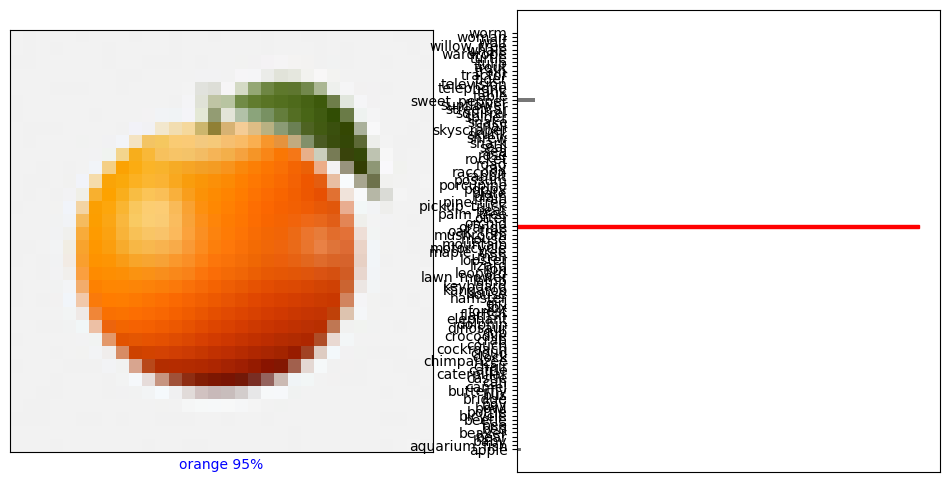

In [7]:
# Prompt user to input the image path
image_path = input("Please enter the path to the image: ")

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make a prediction
predictions = saved_model.predict(processed_image)

# Convert the prediction to a human-readable class name
predicted_class = class_names[np.argmax(predictions)]
print(f'The model predicts this image as: {predicted_class}')

# Visualize the prediction and the prediction bar graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_image(predictions[0], processed_image[0])
plt.subplot(1, 2, 2)
plot_value_array(predictions[0])
plt.show()
